In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Loading the data.

In [2]:
df = pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')

Displaying data records.

In [3]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


Displaying count of each instance in dataset.

In [4]:
df.count()

baseline value                                            2126
accelerations                                             2126
fetal_movement                                            2126
uterine_contractions                                      2126
light_decelerations                                       2126
severe_decelerations                                      2126
prolongued_decelerations                                  2126
abnormal_short_term_variability                           2126
mean_value_of_short_term_variability                      2126
percentage_of_time_with_abnormal_long_term_variability    2126
mean_value_of_long_term_variability                       2126
histogram_width                                           2126
histogram_min                                             2126
histogram_max                                             2126
histogram_number_of_peaks                                 2126
histogram_number_of_zeroes                             

Displaying count of null values ( if any ):


In [5]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

Displaying summary of dataset.

In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Assigning x and y, x as the independent variable and y as the dependent variable.


In [7]:
x = df.drop(['fetal_health'], axis = 1)
y = df [['fetal_health']]

Splitting the dataset into training and testing state. 

In [8]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2)

**Decision Tree**

Making the model.

In [9]:
dtc = DecisionTreeClassifier()
dtc.fit (trainX, trainY)

DecisionTreeClassifier()

Making the confusion matrix.

In [10]:
y_predicted = dtc.predict(testX)

In [11]:
confusion_matrix(testY,y_predicted)

array([[329,   4,   4],
       [ 14,  50,   0],
       [  1,   1,  23]])

Calculating precision, recall, specificity, and f1-score.

In [12]:
dt_tp = 313 + 47 + 37
dt_fp = 7 + 1 + 17 + 3 + 0 + 1
dt_fn = 17 + 0 + 7 + 1 + 1 + 3
dt_tn = 47 + 37 + 313 + 37 + 313 + 47

dt_precision = dt_tp/(dt_tp+dt_fp)
dt_recall = dt_tp/(dt_tp+dt_fn)
dt_specificity = dt_tn/(dt_fp+dt_tn)
dt_f1= 2* (dt_precision*dt_recall)/(dt_precision+dt_recall)
dt_precision, dt_recall, dt_specificity, dt_f1

(0.931924882629108, 0.931924882629108, 0.9647630619684082, 0.931924882629108)

#Plot the performance scores

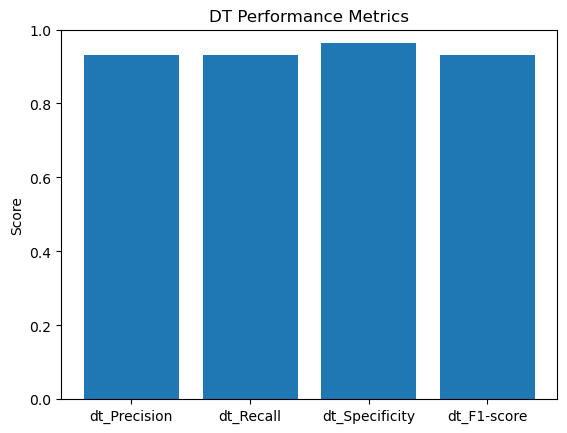

dt_Precision: 93.1924882629108%
dt_Recall: 93.1924882629108%
dt_Specificity: 96.47630619684082%
dt_F1-score: 93.1924882629108%


In [13]:
scores_label = [ 'dt_Precision', 'dt_Recall', 'dt_Specificity', 'dt_F1-score']
scores_values = [dt_precision, dt_recall, dt_specificity , dt_f1]

plt.bar(scores_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('DT Performance Metrics')

# Show the plot
plt.show()
i=0
for x in scores_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

**Logistic Regression**

Making the model.

In [14]:
rlr = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

rlr.fit(trainX, trainY.values.ravel())

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [15]:
y_predicted = rlr.predict(testX)

In [16]:
confusion_matrix(testY,y_predicted)

array([[325,  10,   2],
       [ 46,  18,   0],
       [  5,   8,  12]])

In [17]:
rlr_tp = 363
rlr_fp = 63
rlr_fn = 63
rlr_tn = 726

rlr_precision = rlr_tp/(rlr_tp+rlr_fp)
rlr_recall = rlr_tp/(rlr_tp+rlr_fn)
rlr_specificity = rlr_tn/(rlr_fp+rlr_tn)
rlr_f1= 2* (rlr_precision*rlr_recall)/(rlr_precision+rlr_recall)
rlr_precision, rlr_recall, rlr_specificity, rlr_f1

(0.852112676056338, 0.852112676056338, 0.9201520912547528, 0.852112676056338)

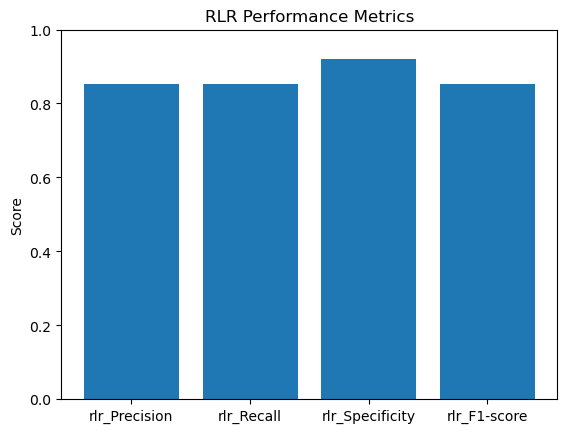

rlr_Precision: 85.2112676056338%
rlr_Recall: 85.2112676056338%
rlr_Specificity: 92.01520912547528%
rlr_F1-score: 85.2112676056338%


In [18]:
scores_label = [ 'rlr_Precision', 'rlr_Recall', 'rlr_Specificity', 'rlr_F1-score']
scores_values = [rlr_precision, rlr_recall, rlr_specificity , rlr_f1]

plt.bar(scores_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('RLR Performance Metrics')

# Show the plot
plt.show()
i=0
for x in scores_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

**SVM**

Making the model

In [19]:
svm = SVC(kernel='linear')
svm.fit(trainX, trainY.values.ravel())

SVC(kernel='linear')

Making the confusion matrix.

In [20]:
y_predicted = svm.predict(testX)

In [21]:
confusion_matrix(testY,y_predicted)

array([[323,  13,   1],
       [ 29,  30,   5],
       [  3,   4,  18]])

Calculating precision, recall, specificity, and f1-score.

In [22]:
svm_tp = 374
svm_fp = 52
svm_fn = 52
svm_tn = 748

svm_precision = svm_tp/(svm_tp+svm_fp)
svm_recall = svm_tp/(svm_tp+svm_fp)
svm_specificity = svm_tn/(svm_fp+svm_tn)
svm_f1= 2*(svm_precision*svm_recall)/(svm_precision+svm_recall)
svm_precision, svm_recall, svm_specificity, svm_f1

(0.8779342723004695, 0.8779342723004695, 0.935, 0.8779342723004695)

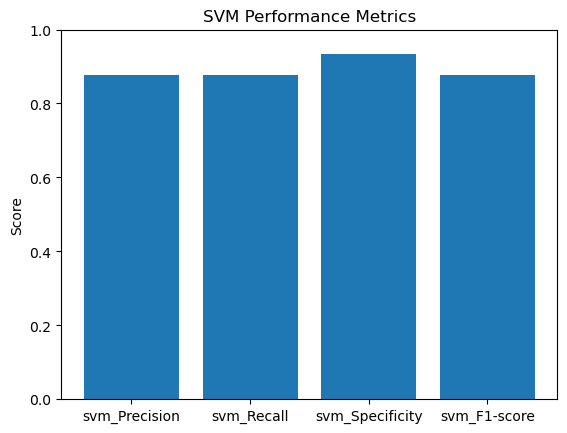

svm_Precision: 87.79342723004694%
svm_Recall: 87.79342723004694%
svm_Specificity: 93.5%
svm_F1-score: 87.79342723004694%


In [23]:
scores_label = [ 'svm_Precision', 'svm_Recall', 'svm_Specificity', 'svm_F1-score']
scores_values = [svm_precision, svm_recall, svm_specificity , svm_f1]

plt.bar(scores_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('SVM Performance Metrics')

# Show the plot
plt.show()
i=0
for x in scores_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

**Naive Bayes**

Making the model.


In [24]:
nb = GaussianNB()
nb.fit(trainX, trainY.values.ravel())

GaussianNB()

Making the confusion matrix

In [25]:
y_predicted = nb.predict(testX)

In [26]:
confusion_matrix(testY,y_predicted)

array([[272,  55,  10],
       [  7,  55,   2],
       [  2,   9,  14]])

Calculating precision, recall, specificity, and f1-score.

In [27]:
nb_tp = 351
nb_fp =75
nb_fn = 75
nb_tn = 702

nb_precision = nb_tp/(nb_tp+nb_fp)
nb_recall = nb_tp/(nb_tp+nb_fn)
nb_specificity = nb_tn/(nb_fp+nb_tn)
nb_f1= 2* (nb_precision*nb_recall)/(nb_precision+nb_recall)
nb_precision, nb_recall, nb_specificity, nb_f1

(0.823943661971831, 0.823943661971831, 0.9034749034749034, 0.823943661971831)

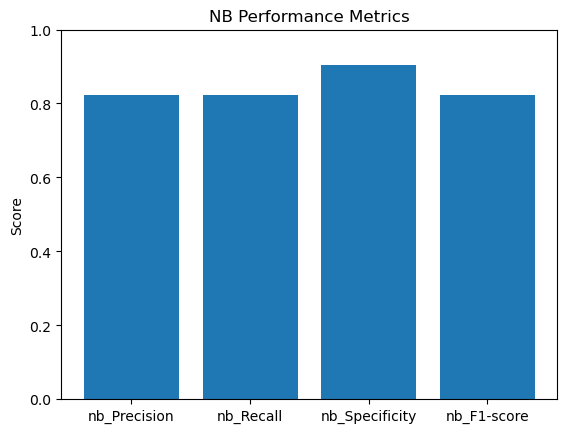

nb_Precision: 82.3943661971831%
nb_Recall: 82.3943661971831%
nb_Specificity: 90.34749034749035%
nb_F1-score: 82.3943661971831%


In [28]:
scores_label = [ 'nb_Precision', 'nb_Recall', 'nb_Specificity', 'nb_F1-score']
scores_values = [nb_precision, nb_recall, nb_specificity , nb_f1]

plt.bar(scores_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('NB Performance Metrics')

# Show the plot
plt.show()
i=0
for x in scores_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

**Random Forest**

Making the model.

In [29]:
rf = RandomForestClassifier()
rf.fit(trainX, trainY.values.ravel())

RandomForestClassifier()

Making the confusion matrix.

In [30]:
y_predicted = svm.predict(testX)
y_actual=testY

In [31]:
confusion_matrix(testY,y_predicted)

array([[323,  13,   1],
       [ 29,  30,   5],
       [  3,   4,  18]])

Calculating precision, recall, specificity, and f1-score.

In [32]:
rf_tp = 374
rf_fp = 52
rf_fn = 52
rf_tn = 748

rf_precision = rf_tp/(rf_tp+rf_fp)
rf_recall = rf_tp/(rf_tp+rf_fn)
rf_specificity = rf_tn/(rf_fp+rf_tn)
rf_f1= 2* (rf_precision*rf_recall)/(rf_precision+rf_recall)
rf_precision, rf_recall, rf_specificity, rf_f1

(0.8779342723004695, 0.8779342723004695, 0.935, 0.8779342723004695)

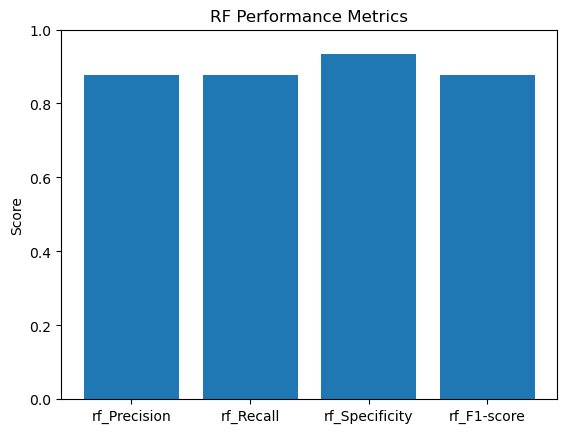

rf_Precision: 87.79342723004694%
rf_Recall: 87.79342723004694%
rf_Specificity: 93.5%
rf_F1-score: 87.79342723004694%


In [33]:
scores_label = [ 'rf_Precision', 'rf_Recall', 'rf_Specificity', 'rf_F1-score']
scores_values = [rf_precision, rf_recall, rf_specificity , rf_f1]

plt.bar(scores_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('RF Performance Metrics')

# Show the plot
plt.show()
i=0
for x in scores_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

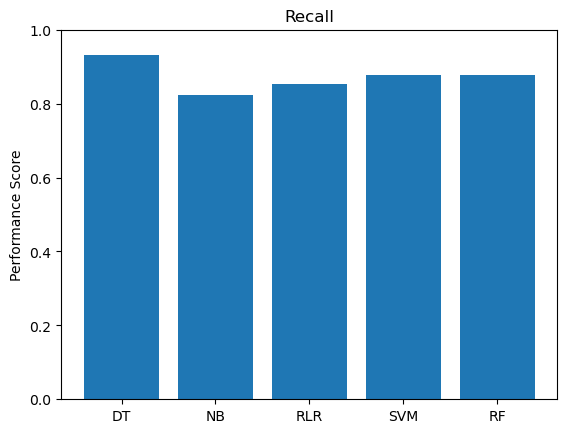

DT: 93.1924882629108%
NB: 82.3943661971831%
RLR: 85.2112676056338%
SVM: 87.79342723004694%
RF: 87.79342723004694%


In [34]:
models_label = ['DT', 'NB', 'RLR', 'SVM', 'RF']
scores_values = [dt_recall, nb_recall, rlr_recall,svm_recall, rf_recall]

plt.bar(models_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Performance Score')
plt.title('Recall')

# Show the plot
plt.show()
i=0
for x in models_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

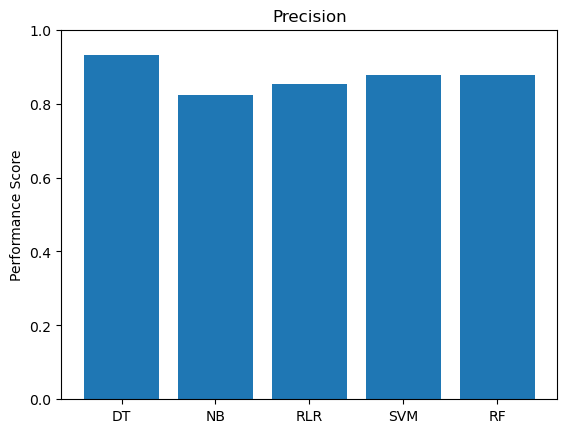

DT: 93.1924882629108%
NB: 82.3943661971831%
RLR: 85.2112676056338%
SVM: 87.79342723004694%
RF: 87.79342723004694%


In [35]:
models_label = ['DT', 'NB', 'RLR', 'SVM', 'RF']
scores_values = [dt_precision, nb_precision, rlr_precision,svm_precision, rf_precision]

plt.bar(models_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Performance Score')
plt.title('Precision')

# Show the plot
plt.show()
i=0
for x in models_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

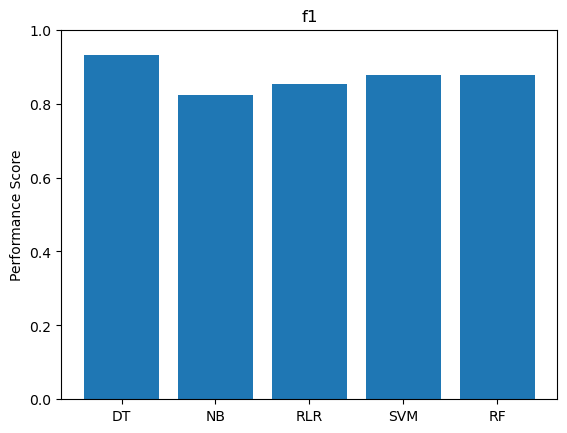

DT: 93.1924882629108%
NB: 82.3943661971831%
RLR: 85.2112676056338%
SVM: 87.79342723004694%
RF: 87.79342723004694%


In [36]:
models_label = ['DT', 'NB', 'RLR', 'SVM', 'RF']
scores_values = [dt_f1, nb_f1, rlr_f1,svm_f1, rf_f1]
plt.bar(models_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Performance Score')
plt.title('f1')
# Show the plot
plt.show()
i=0
for x in models_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

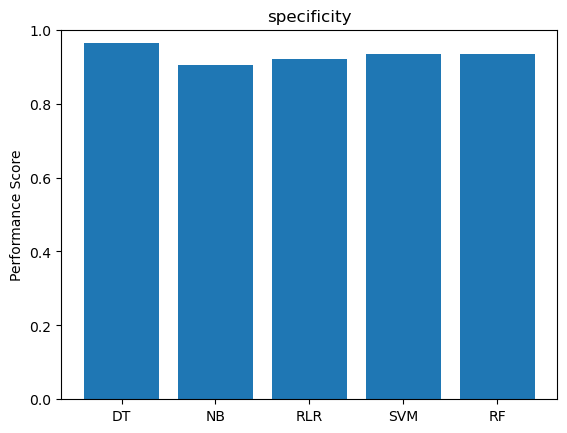

DT: 96.47630619684082%
NB: 90.34749034749035%
RLR: 92.01520912547528%
SVM: 93.5%
RF: 93.5%


In [37]:
models_label = ['DT', 'NB', 'RLR', 'SVM', 'RF']
scores_values = [dt_specificity, nb_specificity, rlr_specificity,svm_specificity, rf_specificity]
plt.bar(models_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Performance Score')
plt.title('specificity')
# Show the plot
plt.show()
i=0
for x in models_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1